<a href="https://colab.research.google.com/github/kAi3345/Dark-Matter/blob/main/GravitationalWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99255 sha256=58eddfdbbe55d8d79edf1c289b67c55c0ecc1f48d641a452cc86f411bdd58af1
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


In [31]:
t0 = 1264316116.4             # GW200129_065458
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', t0 - 48, t0 + 48)

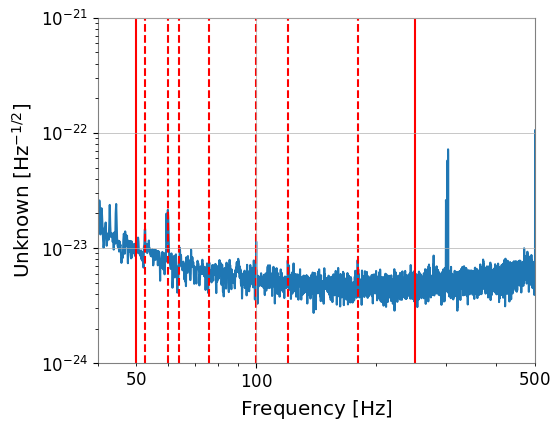

In [32]:
import matplotlib.pyplot as plt

fig2 = hdata.asd(fftlength=8).plot()
plt.xlim(40,500)
ymin = 1e-24
ymax = 1e-21
plt.ylim(ymin, ymax)
plt.vlines(52.5, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(64, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(76, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(100, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(50, ymin, ymax, linestyle="solid", color="red")
plt.vlines(250, ymin, ymax, linestyle="solid", color="red")

In [33]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50,250, hdata.sample_rate)
notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60,64,52.5,76,100,120,180)]

zpk = filter_design.concatenate_zpks(bp, *notches)

hfilt = hdata.filter(zpk, filtfilt=True)

In [34]:
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))

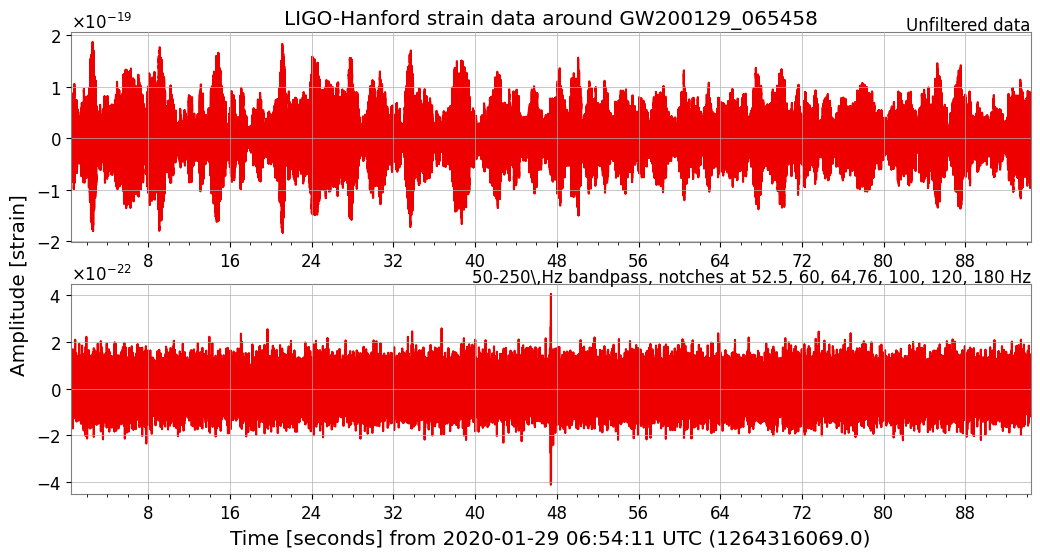

In [35]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW200129_065458')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 52.5, 60, 64,76, 100, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

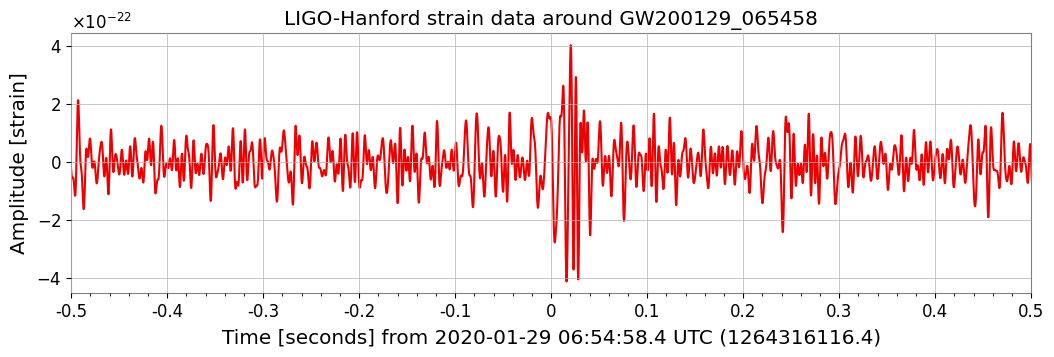

In [36]:
import matplotlib.pyplot as plt

plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW200129_065458')
ax.set_ylabel('Amplitude [strain]')
ax.set_xlim(t0 - 0.5, t0 + 0.5)
ax.set_xscale('seconds', epoch=t0)
plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()

In [37]:
ldata = TimeSeries.fetch_open_data('L1', t0 - 0.7, t0 + 0.7)
lfilt = ldata.filter(zpk, filtfilt=True)

In [38]:
lfilt.shift('6.9ms')
lfilt *= -1

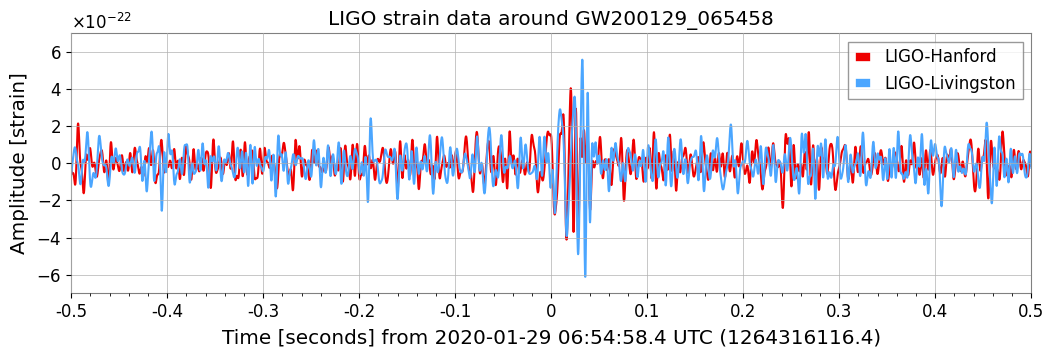

In [39]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_title('LIGO strain data around GW200129_065458')
ax.set_xlim(t0 - 0.5, t0 + 0.5)
ax.set_xscale('seconds', epoch=t0)
ax.set_ylabel('Amplitude [strain]')
ax.set_ylim(-7e-22, 7e-22)
ax.legend()
plot.show()

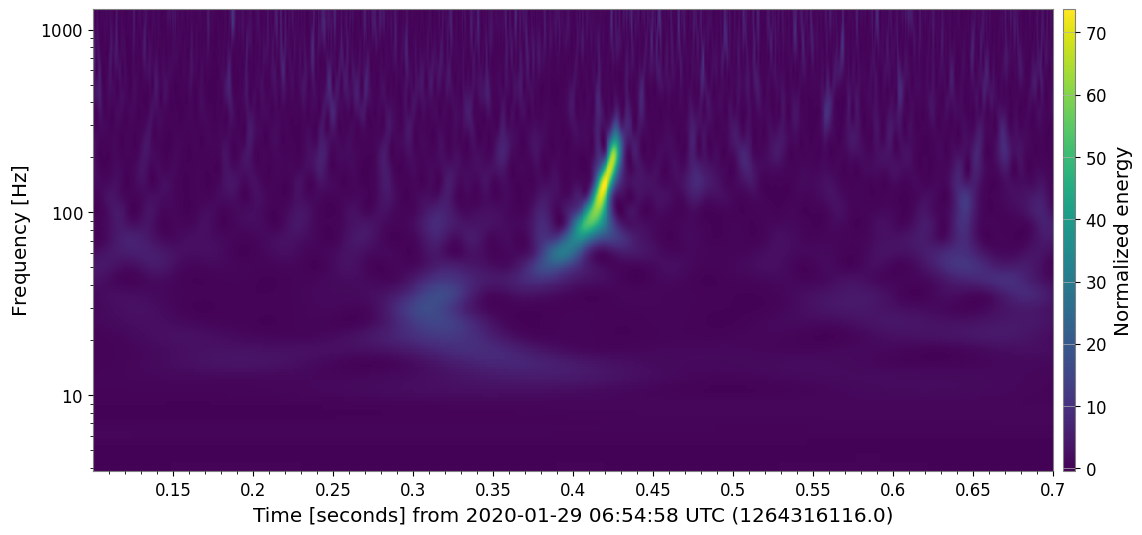

In [40]:
dt = 0.3
hq = hfilt.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

In [66]:
from scipy.io.wavfile import write
import numpy as np

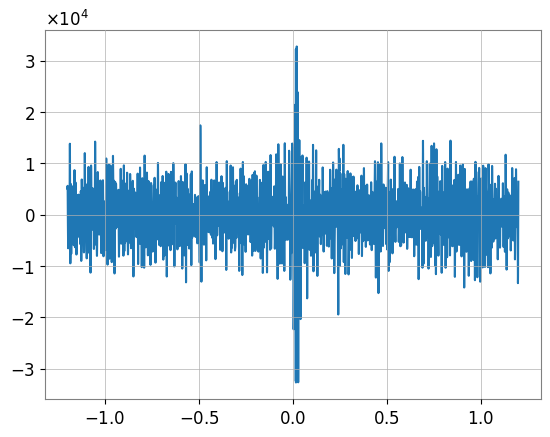

In [73]:
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+1.2)) & (x_val > (t0-1.2)))
y = y_val[ind]
y = y / np.max(y)
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16))

In [74]:
from google.colab import files

In [76]:
import numpy as np
import astropy.units as u
import astropy.constants as ac

delta_t = 0.015 * u.second
M_blackholes = delta_t * ac.c**3 / (16 * np.pi * ac.G)
print(M_blackholes.to(u.solMass))

60.585943912902685 solMass


In [77]:
h = 0.48e-21
Rsch = 2 * ac.G * M_blackholes / 2.0 / ac.c**2
print("Rsch = ", Rsch.to(u.km))
D = Rsch / h
print("Distance of the merger = ", D.to(1e6 * u.parsec))

Rsch =  89.46272173569267 km
Distance of the merger =  6040.186162049105 1e+06 pc


In [60]:
t_clip = 1.5
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+t_clip)) & (x_val > (t0-t_clip)))
x = x_val[ind]
y = y_val[ind]

In [61]:
up_frequency = 3

y_fft = np.fft.fft(y)
y_fft_new = np.zeros(np.shape(y_fft), dtype=np.cdouble)
y_fft_old = y_fft




In [62]:
num = len(y_fft)
for i in np.arange(int(num / up_frequency)):
    y_fft_new[int(i * up_frequency)] = y_fft[int(i)]

y_old = np.fft.ifft(y_fft_old)

for i in np.arange(num):
  if i > (num / 2):
    y_fft_new[i] = np.conjugate(y_fft_new[int(num) - i])

#y_fft_new = np.fft.fftshift(y_fft_new)
y = np.fft.ifft(y_fft_new)


<ipython-input-63-94a735049729>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
<ipython-input-63-94a735049729>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")


0.5


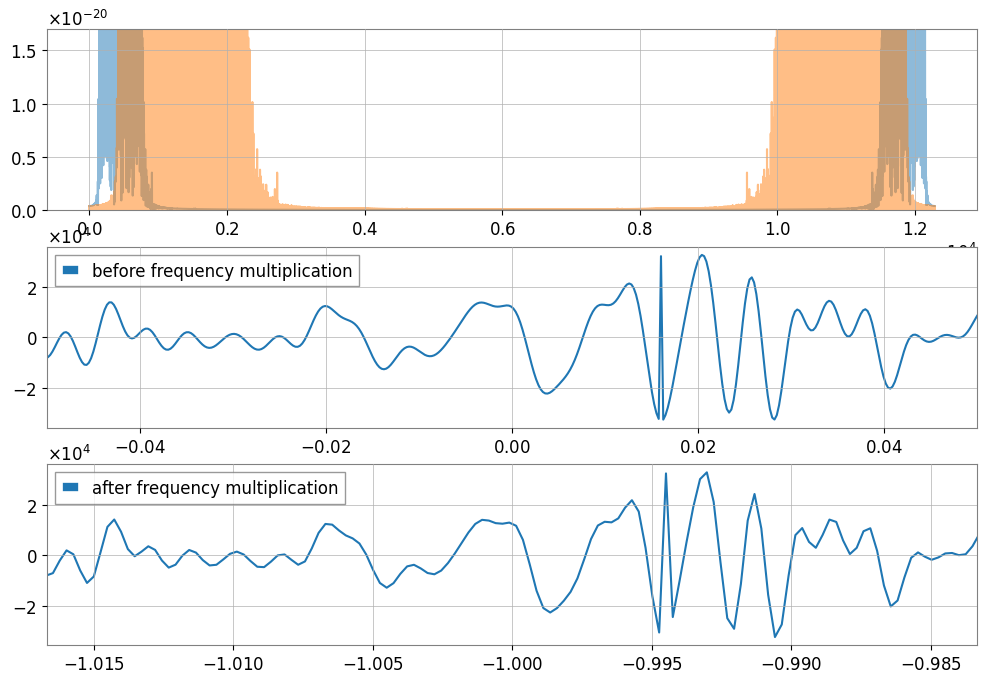

In [63]:
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(np.abs(y_fft_old), alpha=0.5)
plt.plot(np.abs(y_fft_new), alpha=0.5)
ylim = np.percentile(np.abs(y_fft), 95)
plt.ylim(0, ylim)

plt.subplot(312)
y_old = y_old / np.max(y_old)
plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(313)
y = y / np.max(y)
plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
plt.xlim(-t_clip + t_clip / up_frequency - 0.05 / up_frequency, -t_clip + t_clip / up_frequency + 0.05 / up_frequency)
plt.legend()
print(t_clip / up_frequency)


In [52]:
!pip install pydub
from pydub import AudioSegment

(0.0, 0.1)

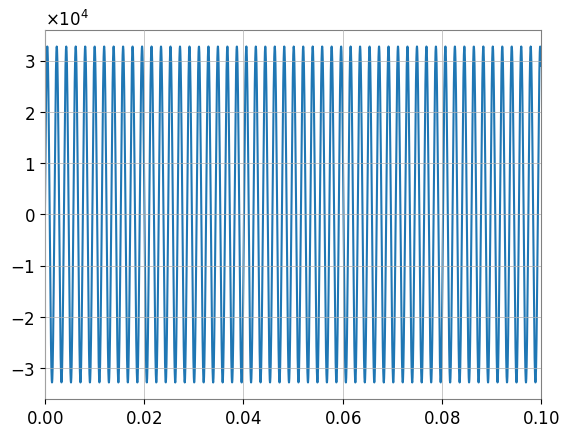

In [64]:
samplerate = 44100; fs = 261.63 * 2.0
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
plt.plot(t, data)
plt.xlim(0, 0.1)

In [70]:
write("C.wav", samplerate, data.astype(np.int16))
files.download("C.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>